In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston



In [2]:
boston = load_boston()


In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
#convert the boston data into a pandas data frame
bostonDF = pd.DataFrame(boston.data)
bostonDF.sample(7)

,0,1,2,3,4,5,6,7,8,9,10,11,12
174,0.08447,0.0,4.05,0.0,0.510,5.859,68.7,2.7019,5.0,296.0,16.6,393.23,9.64
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
328,0.06617,0.0,3.24,0.0,0.460,5.868,25.8,5.2146,4.0,430.0,16.9,382.44,9.97
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77
485,3.67367,0.0,18.10,0.0,0.583,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10
363,4.22239,0.0,18.10,1.0,0.770,5.803,89.0,1.9047,24.0,666.0,20.2,353.04,14.64


In [8]:
# Add column names
bostonDF.columns = boston.feature_names
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# Adding the target to the df
bostonDF['PRICE'] = boston.target


Predicting Housing Prices with Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
X = bostonDF.drop('PRICE', axis=1)
y = bostonDF['PRICE']
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The LR objects supports several methods :
    fit()
    
    predict() : predicts y using the LR model's estimated coeffs
    
    score() : returns the coeff of determination R²
    
    get_params()    mro()     register()      set_params()

In [12]:
# FITTING THE MODEL
# we are going to use all 13 parameters to fit a LR model

lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print('Estimated intercept coeff :', lm.intercept_)
print('Number of coeffs :', len(lm.coef_))
print('coeffs = ', lm.coef_)

Estimated intercept coeff : 36.4594883850899
Number of coeffs : 13
coeffs =  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [14]:
#create a DF with the coeffs

pd.DataFrame(zip(X.columns, lm.coef_),
            columns = ['features', 'estimatedCoeffs'])

,features,estimatedCoeffs
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Text(0.5, 1.0, 'Price vs. # Rooms')

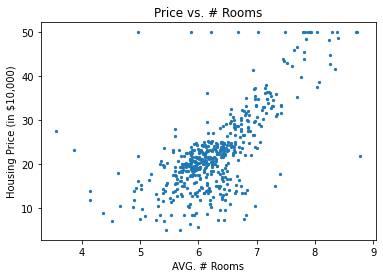

In [15]:
# generate a plot of Price versus RM (avg of rooms per dwelling)

%matplotlib inline
plt.scatter(bostonDF.RM, bostonDF.PRICE, s=5)
plt.xlabel('AVG. # Rooms')
plt.ylabel('Housing Price (in $10,000)')
plt.title('Price vs. # Rooms')

In [16]:
# Predicting Prices

lm.predict(X)[0:10]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211])

Text(0.5, 1.0, 'Real vs. Predicted Housing Prices')

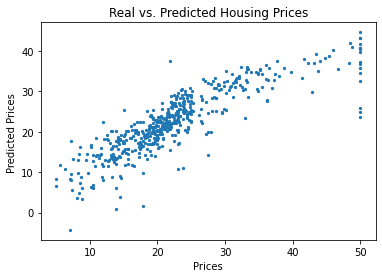

In [17]:
# plot prediction against real values
plt.scatter( bostonDF.PRICE, lm.predict(X), s=5)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices ')
plt.title('Real vs. Predicted Housing Prices')

In [18]:
# let compute the mse
mse = np.mean((bostonDF.PRICE-lm.predict(X))**2)
print('Mean Squared Error = ', mse)

Mean Squared Error =  21.894831181729202


In [19]:
# Training and Validating
X_train, X_test, y_train, y_test = \
train_test_split(X, bostonDF.PRICE, test_size=0.33, random_state=5)


#X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(339, 13) (167, 13) (339,) (167,)


In [20]:
# Building a LR model using only the train data.

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)
print( 'mse_train = ', np.mean((y_train-lm.predict(X_train))**2))
print( 'mse_test = ', np.mean((y_test-lm.predict(X_test))**2))

mse_train =  19.546758473534666
mse_test =  28.530458765974615


Text(0.5, 1.0, 'Residuals')

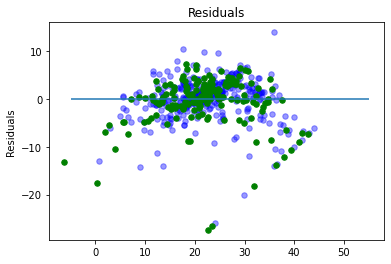

In [22]:
# PLOTTING THE RESIDUALS

plt.scatter( lm.predict(X_train), lm.predict(X_train)-y_train, c='b', s=30, alpha=0.4)
plt.scatter( lm.predict(X_test), lm.predict(X_test)-y_test, c='g', s=30)
plt.hlines(y=0,xmin=-5, xmax=55)
plt.ylabel('Residuals ')
plt.title('Residuals')